## Set up virtual environment 

In [1]:
import os
path='/work/student_folders/Ida_D_folder/notebooks_fMRI' # Remember to change this to your own path
os.chdir(path)
!/work/notebooks_fMRI/activate.sh

Installed kernelspec virt_env in /home/ucloud/.local/share/jupyter/kernels/virt_env
Done! Remember changing the kernel in Jupyter.


## Import

In [54]:
# import some functionality
from datetime import datetime

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
import matplotlib.pyplot as plt

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 13:25:04
Finishing cell: 13:25:04


## Read in fMRI data


In [109]:
import os

def list_files(startpath):
    """ Simple function to show directory tree. 
    From: https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python. """
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print('{}{}'.format(subindent, f))
            
data_dir='/work/fMRI_data/BIDS_2024E/' 
derivatives_dir=  '/work/fMRI_data/BIDS_2024E/derivatives/' 

# If you want to plot the BIDS file tree
#list_files(derivatives_dir)

In [110]:
from nilearn.glm.first_level import first_level_from_bids

# BIDS directory
data_dir='/work/fMRI_data/BIDS_2024E/'
# BIDS derivatives (contains preprocessed data)
derivatives_dir='/work/fMRI_data/BIDS_2024E/derivatives' 
# Name for experiment in the BIDS directory
task_label = 'boldiowa'
# Label for data that are spatially aligned to the MNI152 template (i.e. spatially normalised)
space_label ='MNI152NLin2009cAsym'
# Run the function that can gather all the needed info from a BIDS folder
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label, derivatives_folder=derivatives_dir, n_jobs=-2, verbose=1,
        img_filters=[('desc', 'preproc')])


now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1398: UserWarning: 'slice_time_ref' provided (0.0) is different from the value found in the BIDS dataset (0.462).
Note this may lead to the wrong model specification.
  warn(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1454: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  events = _get_events_files(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1467: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  confounds = _get_confounds(


Found the following 4 preprocessed BOLD files
 for subject 0141
 for filter: [('task', 'boldiowa'), ('desc', 'preproc')]:
 ['/work/fMRI_data/BIDS_2024E/derivatives/sub-0141/ses-001/func/sub-0141_ses-001_task-boldiowa_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0141/ses-001/func/sub-0141_ses-001_task-boldiowa_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0141/ses-001/func/sub-0141_ses-001_task-boldiowa_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0141/ses-001/func/sub-0141_ses-001_task-boldiowa_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

Found the following 4 events files
 for subject 0141
 for filter: [('task', 'boldiowa')]:
 ['/work/fMRI_data/BIDS_2024E/sub-0141/ses-001/func/sub-0141_ses-001_task-boldiowa_run-1_echo-1_events.tsv', '/work/fMRI_data/BIDS_2024E/sub-0141/ses

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1454: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  events = _get_events_files(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1467: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  confounds = _get_confounds(


Found the following 4 preprocessed BOLD files
 for subject 0142
 for filter: [('task', 'boldiowa'), ('desc', 'preproc')]:
 ['/work/fMRI_data/BIDS_2024E/derivatives/sub-0142/ses-001/func/sub-0142_ses-001_task-boldiowa_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0142/ses-001/func/sub-0142_ses-001_task-boldiowa_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0142/ses-001/func/sub-0142_ses-001_task-boldiowa_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0142/ses-001/func/sub-0142_ses-001_task-boldiowa_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

Found the following 4 events files
 for subject 0142
 for filter: [('task', 'boldiowa')]:
 ['/work/fMRI_data/BIDS_2024E/sub-0142/ses-001/func/sub-0142_ses-001_task-boldiowa_run-1_echo-1_events.tsv', '/work/fMRI_data/BIDS_2024E/sub-0142/ses

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1454: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  events = _get_events_files(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1467: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  confounds = _get_confounds(


Found the following 4 preprocessed BOLD files
 for subject 0140
 for filter: [('task', 'boldiowa'), ('desc', 'preproc')]:
 ['/work/fMRI_data/BIDS_2024E/derivatives/sub-0140/ses-001/func/sub-0140_ses-001_task-boldiowa_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0140/ses-001/func/sub-0140_ses-001_task-boldiowa_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0140/ses-001/func/sub-0140_ses-001_task-boldiowa_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0140/ses-001/func/sub-0140_ses-001_task-boldiowa_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

Found the following 4 events files
 for subject 0140
 for filter: [('task', 'boldiowa')]:
 ['/work/fMRI_data/BIDS_2024E/sub-0140/ses-001/func/sub-0140_ses-001_task-boldiowa_run-1_echo-1_events.tsv', '/work/fMRI_data/BIDS_2024E/sub-0140/ses

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1454: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  events = _get_events_files(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1467: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  confounds = _get_confounds(


Found the following 4 preprocessed BOLD files
 for subject 0139
 for filter: [('task', 'boldiowa'), ('desc', 'preproc')]:
 ['/work/fMRI_data/BIDS_2024E/derivatives/sub-0139/ses-001/func/sub-0139_ses-001_task-boldiowa_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0139/ses-001/func/sub-0139_ses-001_task-boldiowa_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0139/ses-001/func/sub-0139_ses-001_task-boldiowa_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0139/ses-001/func/sub-0139_ses-001_task-boldiowa_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

Found the following 4 events files
 for subject 0139
 for filter: [('task', 'boldiowa')]:
 ['/work/fMRI_data/BIDS_2024E/sub-0139/ses-001/func/sub-0139_ses-001_task-boldiowa_run-1_echo-1_events.tsv', '/work/fMRI_data/BIDS_2024E/sub-0139/ses

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1454: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  events = _get_events_files(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1467: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  confounds = _get_confounds(


Found the following 4 preprocessed BOLD files
 for subject 0138
 for filter: [('task', 'boldiowa'), ('desc', 'preproc')]:
 ['/work/fMRI_data/BIDS_2024E/derivatives/sub-0138/ses-001/func/sub-0138_ses-001_task-boldiowa_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0138/ses-001/func/sub-0138_ses-001_task-boldiowa_run-2_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0138/ses-001/func/sub-0138_ses-001_task-boldiowa_run-3_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/work/fMRI_data/BIDS_2024E/derivatives/sub-0138/ses-001/func/sub-0138_ses-001_task-boldiowa_run-4_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

Found the following 4 events files
 for subject 0138
 for filter: [('task', 'boldiowa')]:
 ['/work/fMRI_data/BIDS_2024E/sub-0138/ses-001/func/sub-0138_ses-001_task-boldiowa_run-1_echo-1_events.tsv', '/work/fMRI_data/BIDS_2024E/sub-0138/ses

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1454: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  events = _get_events_files(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1467: UserWarning: The filter ('desc', 'preproc') will be skipped. 'desc' is not among the supported filters. Allowed filters include: ['sub', 'ses', 'task', 'acq', 'ce', 'rec', 'dir', 'run', 'echo', 'part']
  confounds = _get_confounds(


Finishing cell: 13:56:14


In [111]:
# Ensure consistency in how data is loaded

!pip install numpy
import numpy as np

n=len(models)
sub_labels=list()

# Order of data currently 
print('Original order of data:')
for xx in range(n):
    sub_labels.append(models[xx].subject_label)
    print(sub_labels[xx])

# Sort the parcipants by number
sort_list=np.argsort(sub_labels)
print(sort_list)
models=[models[i] for i in sort_list]
models_run_imgs=[models_run_imgs[i] for i in sort_list]
models_events=[models_events[i] for i in sort_list]
models_confounds=[models_confounds[i] for i in sort_list]
sub_labels_new=list()

# New order of data
print('New order of data:')
for xx in range(n):
    sub_labels_new.append(models[xx].subject_label)
    print(sub_labels_new[xx])


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Original order of data:
0141
0136
0142
0140
0139
0138
[1 5 4 3 0 2]
New order of data:
0136
0138
0139
0140
0141
0142


## Subset confounds and events

In [112]:
# We will be using the friston confounds for our models

confound_friston24 = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']

confound_friston24_GSR = ['global_signal','global_signal_derivative1','global_signal_power2','global_signal_derivative1_power2','trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']

# Subset confounds with selection
for ii in range(len(models_confounds)):
    confounds1=models_confounds[ii][:].copy()
    for i in range(len(confounds1)):
        confounds2=confounds1[i].copy()
        confounds2=confounds2[confound_friston24_GSR]
        #Removing NAs in the first row.
        confounds2.loc[0,:]=confounds2.loc[1,:]
        confounds1[i]=confounds2
    models_confounds[ii][:]=confounds1


#Print new confounds, for first participant, first run
print(models_confounds[0][0].columns)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'trans_x', 'trans_y', 'trans_z',
       'rot_x', 'rot_y', 'rot_z', 'trans_x_derivative1', 'trans_y_derivative1',
       'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1',
       'rot_z_derivative1', 'trans_x_power2', 'trans_y_power2',
       'trans_z_power2', 'rot_x_power2', 'rot_y_power2', 'rot_z_power2'],
      dtype='object')
Finishing cell: 13:56:25


In [113]:
# Sort events sub to only include columns needed

# Print model events for first participant, first run
print(models_events[0][0].columns)

# Specify which ones to use
events_sub= ['onset','duration','trial_type'] 

# Subset confounds with selection
for ii in range(len(models_events)):
    events1=models_events[ii][:]
    for i in range(len(events1)):
        events2=events1[i]
        events2=events2[events_sub]
        events1[i]=events2
    models_events[ii][:]=events1

#Print new events, for first participant, first run
print(models_events[0][0].columns)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Index(['onset', 'duration', 'win', 'loss', 'total', 'trial_type', 'response',
       'n_moves', 'RT', 'run', 'ID', 'task'],
      dtype='object')
Index(['onset', 'duration', 'trial_type'], dtype='object')
Finishing cell: 13:56:27


In [114]:
# Check that all 6 models are saved before moving on to making contrasts
models

# Should always have all the 6 first level models 

[FirstLevelModel(n_jobs=-2, subject_label='0136', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0138', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0139', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0140', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0141', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0142', t_r=1, verbose=1)]

## Check trial information 

In [93]:
# The different trial types
expected_trial_types = ['neutral', 'loss', 'win', 'decks']

# Loop over each participant and run in models_events
for participant_idx, participant_data in enumerate(models_events):
    for run_idx, run_data in enumerate(participant_data):
        
        # Count the occurrences of each trial type in the current run
        trial_counts = run_data['trial_type'].value_counts()
        
        # Check if any expected trial types are missing
        missing_trials = [trial for trial in expected_trial_types if trial not in trial_counts]
        
        # Print information if there are any missing trials (adding 1 because of zero indecxing)
        if missing_trials:
            print(f"For participant with index {participant_idx }: run {run_idx +1} is missing trial types: {missing_trials}")


For participant with index 2: run 2 is missing trial types: ['neutral']
For participant with index 2: run 3 is missing trial types: ['neutral']
For participant with index 4: run 3 is missing trial types: ['loss']
For participant with index 4: run 4 is missing trial types: ['loss']


## First and second level models for each contrast


#### For contrast win - decks

Before running the contrast make sure to run all the code from 'Read in fMRI data' and 'Subset confounds and events' (This ensures that the models from previous contasts are not saved)

In [62]:
from datetime import datetime
from nilearn import plotting
import matplotlib.pyplot as plt
import pickle
import os

# Specify where to save the results
res_dir= '/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks' # must contain 0 file for the next code to run 

In [30]:
# Make path if it does not exist

if os.path.isdir(res_dir)==False:
    print('Making results directory:', res_dir)
    os.mkdir(res_dir)
    n_res_files=    len([name for name in os.listdir('.') if os.path.isfile(name)])
    print ('Number of files in results folder: ', n_res_files)
else:
    print('Results directory ', res_dir, 'already exists')
    # Count number of files in results directory
    wd=os.getcwd()
    os.chdir(res_dir)
    n_res_files=    len([name for name in os.listdir('.') if os.path.isfile(name)])
    print ('Number of files in results folder: ', n_res_files)
    os.chdir(wd)

Results directory  /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks already exists
Number of files in results folder:  13


In [22]:
# First level model on all participants

now = datetime.now()
print('Starting cell:', now.strftime("%H:%M:%S"))

# Zip model and args
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)

for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    print(f"Processing subject: {model.subject_label}")
    
    # File path where the model would be saved
    file = os.path.join(res_dir, f'iowa2024_WIN_DECKS_first_level_model_{model.subject_label}.pkl')

    # Check if the model has already been saved
    if os.path.exists(file):
        print(f"Skipping participant: {model.subject_label} (Already saved: {file})")
        continue  # Skip to the next iteration if the file exists

    # Fit the GLM for subjects not yet processed
    if m_idx + 1 > n_res_files:
        print(f"Fitting participant: {model.subject_label}, ({m_idx + 1}/{len(models)})")
    
        # Fit the model
        model.fit(imgs, events, confounds)


        # Check if 'win' and 'decks' are valid contrast terms
        if 'win' in model.design_matrices_[0].columns and 'decks' in model.design_matrices_[0].columns:
            try:
                # Explicitly check for multi-run data and compute contrast accordingly
                print(f"Computing contrast 'win - decks' for {model.subject_label}")
                
                # Compute contrast
                model.zmap = model.compute_contrast('win - decks', output_type = 'z_score')
                
                # Save fitted model
                print('Saving:', file)
                with open(file, 'wb') as f:
                    pickle.dump([model], f)

                now = datetime.now()
                print('Finished fitting:', model.subject_label, now.strftime("%H:%M:%S"))
            
            except ValueError as e:
                print(f"Error computing contrast for {model.subject_label}: {e}")
        
        else:
            print(f"Skipping participant: {model.subject_label} (No 'win' or 'decks' contrasts)")

now = datetime.now()
print('Finishing cell:', now.strftime("%H:%M:%S"))

Starting cell: 10:59:57
Processing subject: 0136
Fitting participant: 0136, (1/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (75 seconds remaining)
Computing run 3 out of 4 runs (47 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 4 out of 4 runs (22 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)

Computation of 4 runs done in 89.88115692138672 seconds.

/tmp/ipykernel_663/1986605844.py:41: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('win - decks', output_type = 'z_score')


Computing contrast 'win - decks' for 0136
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks2/iowa2024_WIN_DECKS_first_level_model_0136.pkl
Finished fitting: 0136 11:01:59
Processing subject: 0138
Fitting participant: 0138, (2/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (66 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 3 out of 4 runs (42 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 4 out of 4 runs (21 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling

Computing contrast 'win - decks' for 0138
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks2/iowa2024_WIN_DECKS_first_level_model_0138.pkl
Finished fitting: 0138 11:03:54
Processing subject: 0139
Fitting participant: 0139, (3/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (59 seconds remaining)
Computing run 3 out of 4 runs (40 seconds remaining)
Computing run 4 out of 4 runs (20 seconds remaining)

Computation of 4 runs done in 79.97590374946594 seconds.

/tmp/ipykernel_663/1986605844.py:41: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('win - decks', output_type = 'z_score')


Computing contrast 'win - decks' for 0139
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks2/iowa2024_WIN_DECKS_first_level_model_0139.pkl
Finished fitting: 0139 11:05:45
Processing subject: 0140
Fitting participant: 0140, (4/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (76 seconds remaining)
Computing run 3 out of 4 runs (47 seconds remaining)
Computing run 4 out of 4 runs (22 seconds remaining)

Computation of 4 runs done in 89.82523941993713 seconds.

/tmp/ipykernel_663/1986605844.py:41: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('win - decks', output_type = 'z_score')


Computing contrast 'win - decks' for 0140
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks2/iowa2024_WIN_DECKS_first_level_model_0140.pkl
Finished fitting: 0140 11:07:43
Processing subject: 0141
Fitting participant: 0141, (5/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (70 seconds remaining)
Computing run 3 out of 4 runs (44 seconds remaining)
Computing run 4 out of 4 runs (21 seconds remaining)

Computation of 4 runs done in 85.46586918830872 seconds.

/tmp/ipykernel_663/1986605844.py:41: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('win - decks', output_type = 'z_score')


Computing contrast 'win - decks' for 0141
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks2/iowa2024_WIN_DECKS_first_level_model_0141.pkl
Finished fitting: 0141 11:09:38
Processing subject: 0142
Fitting participant: 0142, (6/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (107 seconds remaining)
Computing run 3 out of 4 runs (71 seconds remaining)
Computing run 4 out of 4 runs (35 seconds remaining)

Computation of 4 runs done in 144.43077087402344 seconds.

/tmp/ipykernel_663/1986605844.py:41: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('win - decks', output_type = 'z_score')


Computing contrast 'win - decks' for 0142
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks2/iowa2024_WIN_DECKS_first_level_model_0142.pkl
Finished fitting: 0142 11:12:35
Finishing cell: 11:12:35


In [63]:
# Save 

# Keep only models that have a corresponding file in `results_win_decks`
models = [
    model for model in models
    if os.path.exists(os.path.join(res_dir, f'iowa2024_WIN_DECKS_first_level_model_{model.subject_label}.pkl'))
]

f = open('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks/iowa2024_first_level_models_all.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()

In [64]:
# Load in the first level models

# Check if models are already loaded and if not --> load them
if 'models' not in locals():
    print('Loading saved first-level variables.')

    # Loading the data if it's not already loaded
    with open('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks/iowa2024_first_level_models_all', 'rb') as f:
        models, models_run_imgs, models_events, models_confounds = pickle.load(f)


# Load individually fitted models
for m_idx, model in enumerate(models):
    file = os.path.join(res_dir, f'iowa2024_WIN_DECKS_first_level_model_{model.subject_label}.pkl')
    
    # Check if the file exists
    if os.path.exists(file):
        print(f"Loading fitted model for participant: {model.subject_label} ({m_idx + 1}/{len(models)})")
        with open(file, 'rb') as f:
            loaded_model = pickle.load(f)
        
        # Verify if the subject labels match
        if model.subject_label == loaded_model[0].subject_label:
            models[m_idx] = loaded_model[0]
            print(f"Successfully loaded model for participant: {model.subject_label}")
        else:
            print(f"Subject mismatch for {model.subject_label}")
    else:
        # File not found, skip this participant
        print(f"Skipping participant {model.subject_label} (No saved model file found)")

print("All available models loaded.")


Loading fitted model for participant: 0136 (1/6)
Successfully loaded model for participant: 0136
Loading fitted model for participant: 0138 (2/6)
Successfully loaded model for participant: 0138
Loading fitted model for participant: 0139 (3/6)
Successfully loaded model for participant: 0139
Loading fitted model for participant: 0140 (4/6)
Successfully loaded model for participant: 0140
Loading fitted model for participant: 0141 (5/6)
Successfully loaded model for participant: 0141
Loading fitted model for participant: 0142 (6/6)
Successfully loaded model for participant: 0142
All available models loaded.


In [65]:
# Check that the relevant models are saved correctly 
models

# Should contain 6 models 

[FirstLevelModel(n_jobs=-2, subject_label='0136', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0138', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0139', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0140', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0141', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0142', t_r=1, verbose=1)]

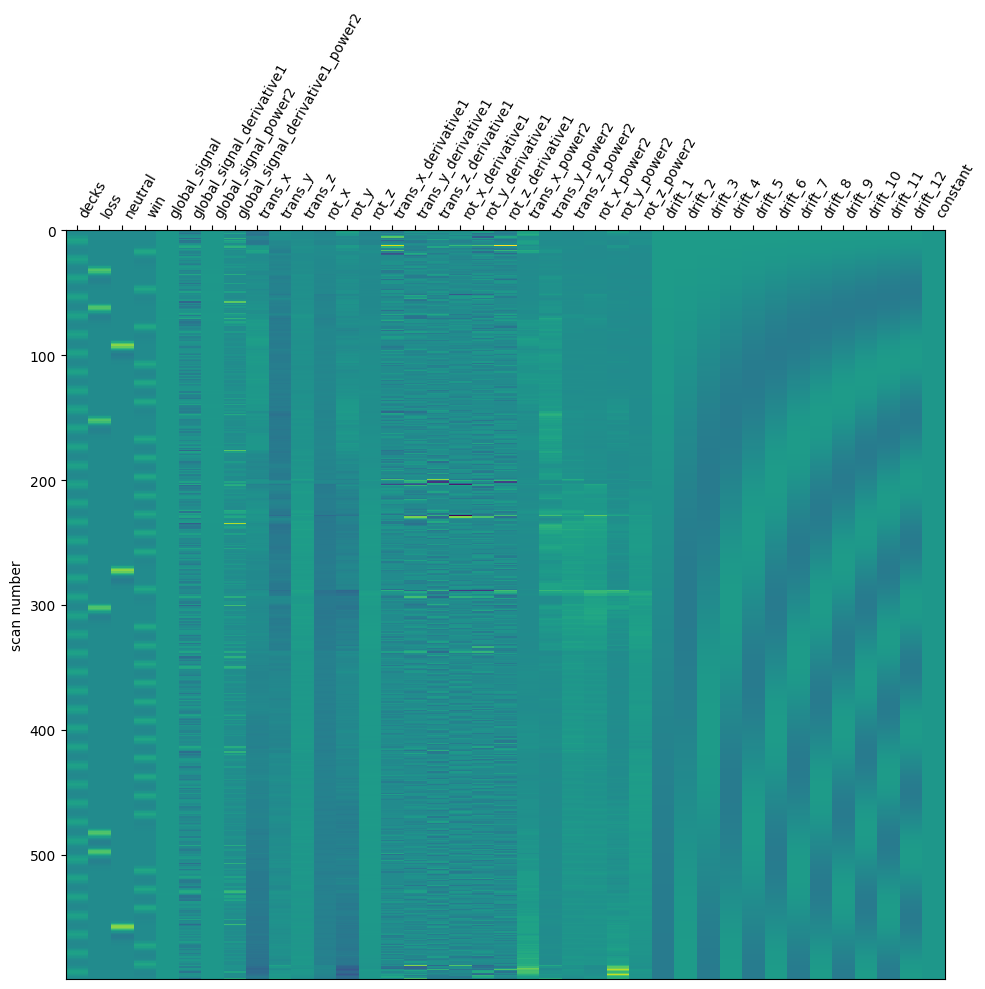

Finishing cell: 13:27:05


In [66]:
# Plot design matrix
from nilearn.plotting import plot_design_matrix

# Fetch data from first participant
model1=models[0]
# View the design matrix
design_matrix = model1.design_matrices_[0]


#Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [73]:
# Print number of each trial

# Base the events list on the paricipants included 
new_models_events=models_events[0] + models_events[1] + models_events[2] + models_events[3] + models_events[4] + models_events[5]


from collections import Counter

# Initialize a counter to hold the aggregate counts of each trial_type
total_trial_counts = Counter()

# Loop over each run's data 
for run_data in new_models_events:
    # Count occurrences of each trial_type in the current run
    trial_counts = run_data['trial_type'].value_counts().to_dict()
    # Update the aggregate counter with counts from the current run
    total_trial_counts.update(trial_counts)

# Print
for trial_type, count in total_trial_counts.items():
    print(f"{trial_type}: {count}")

decks: 960
win: 687
loss: 104
neutral: 169


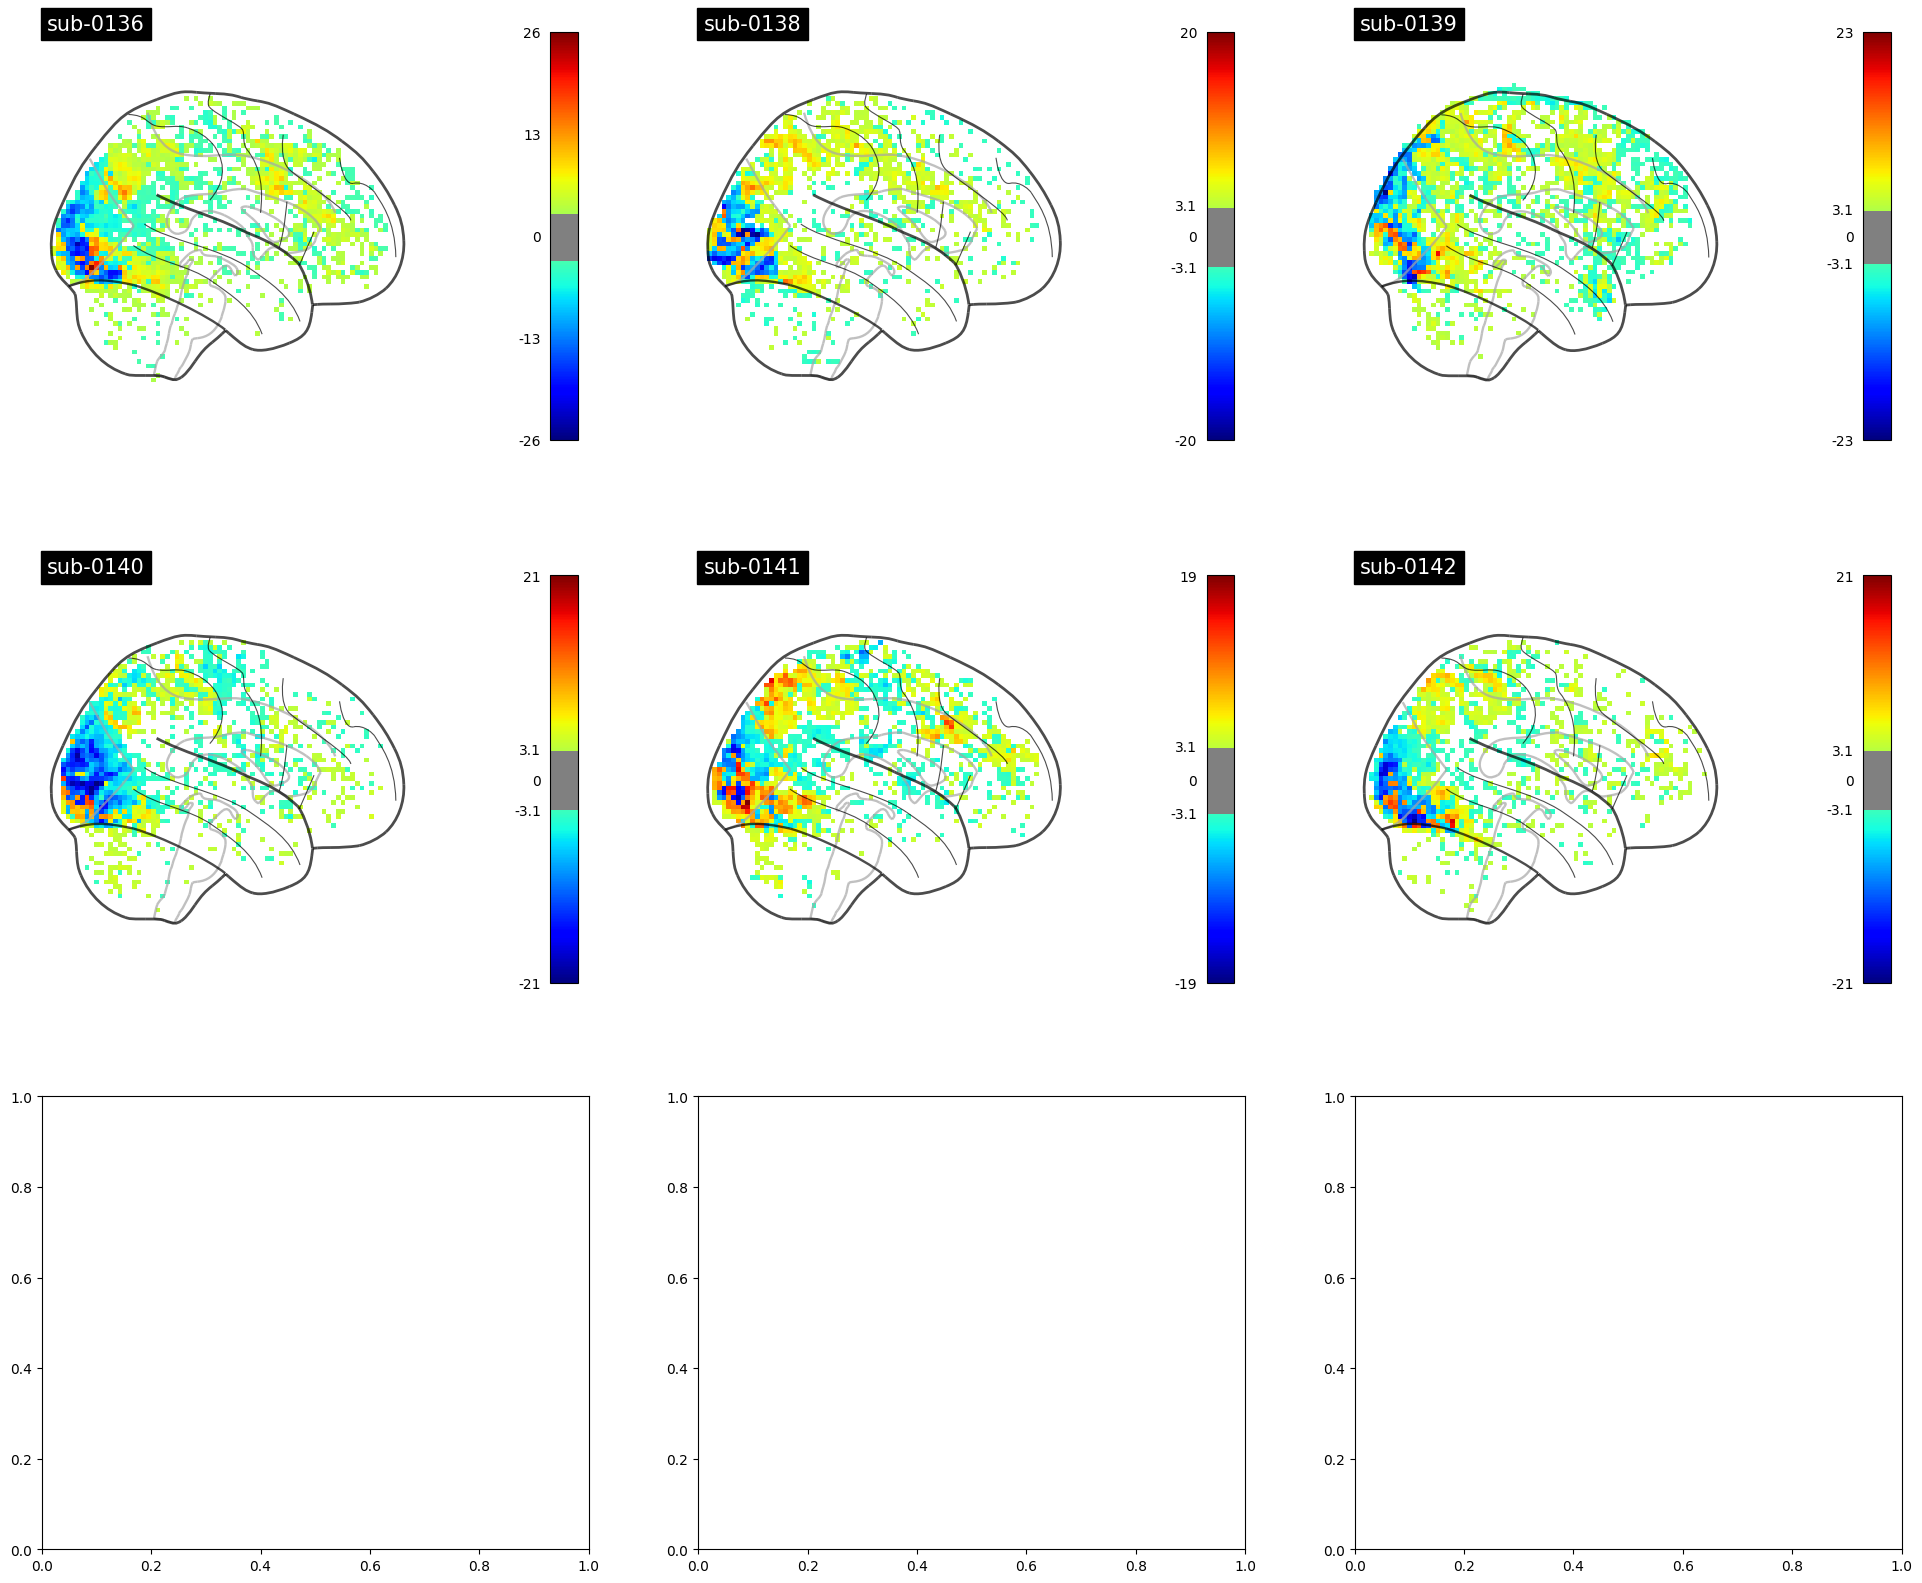

In [28]:
# Plot the first level models

from scipy.stats import norm
p001_unc = norm.isf(0.001)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 20)) 
for m_idx, model in enumerate(models):

    #Plot each thresholded analysis
    plotting.plot_glass_brain(model.zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 3), int(m_idx % 3)],
                              plot_abs=False, display_mode='x')

In [29]:
# Creating second level model 
from nilearn.glm.second_level import SecondLevelModel

#We will simply add the models estimated above to the second level
second_level_input = models

#Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)

print(second_level_model)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 4 runs
  sample_map = sample_model.compute_contrast(


SecondLevelModel(smoothing_fwhm=8.0)
Finishing cell: 11:19:04


In [30]:
# Make contrast 
zmap_g = second_level_model.compute_contrast(
    first_level_contrast='win-decks')

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = mode

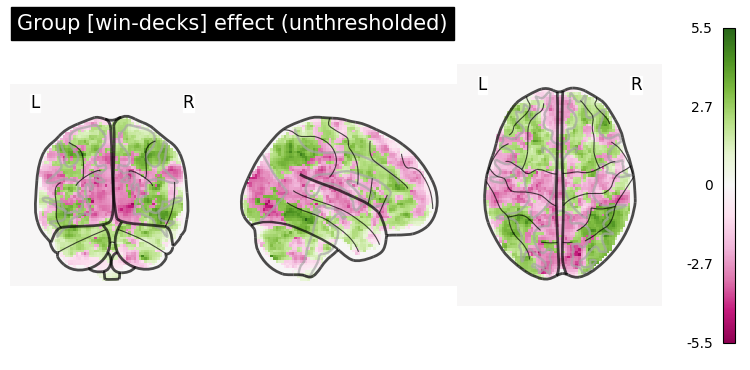

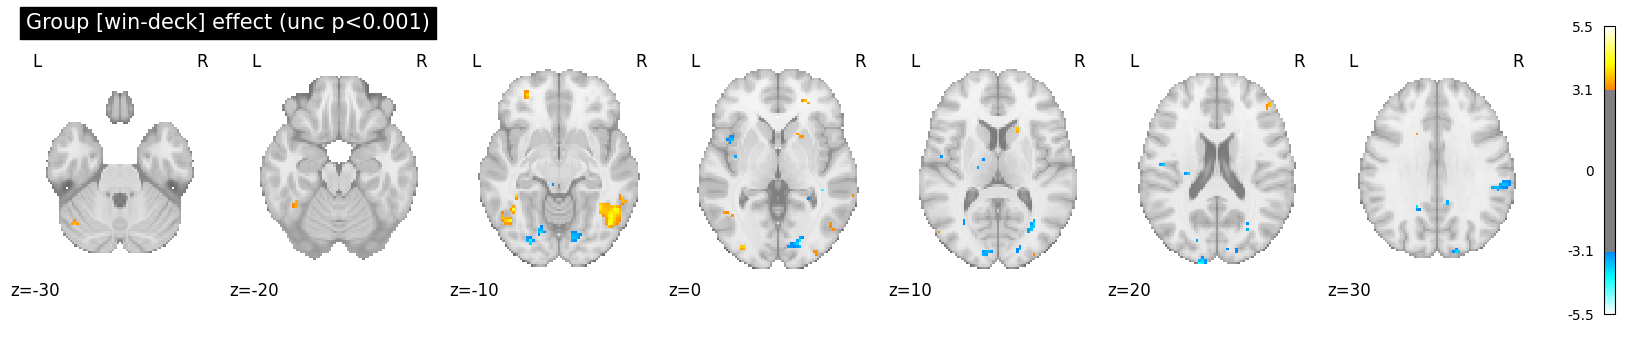

Finishing cell: 11:19:46


In [31]:
# Plot the uncorrected contrast

from nilearn.plotting import plot_stat_map
import matplotlib

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=None,
                          title='Group [win-decks] effect (unthresholded)',
                          plot_abs=False)
plt.show()

plot_stat_map(zmap_g, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group [win-deck] effect (unc p<0.001)')
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

The p<.05 FWER-corrected threshold is 5.03


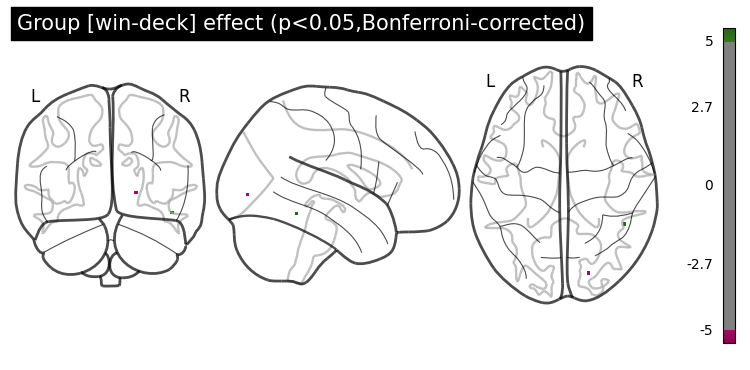

   Cluster ID          X          Y     Z  Peak Stat  Cluster Size (mm3)
0           1  47.482001 -46.615999 -16.0   5.496881                  15


In [32]:
# Plot the corrected contrast

from nilearn.reporting import get_clusters_table

from nilearn.glm import threshold_stats_img

thresholded_map, threshold = threshold_stats_img(
    zmap_g, alpha=0.05, height_control='bonferroni')
print('The p<.05 FWER-corrected threshold is %.3g' % threshold)

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=threshold,
                          title='Group [win-deck] effect (p<0.05,Bonferroni-corrected)',
                          plot_abs=False)
plt.show()

# Make a table of cluster coordinates.
table = get_clusters_table(zmap_g, stat_threshold=threshold)
print(table)

In [34]:
# Create atlas map

import pandas as pd
from atlasreader import create_output
from IPython.display import display, HTML

wd=os.getcwd()
os.chdir('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks')
outdir='/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks'

# Save the thresholded image into a NIfTI file
file_name = "stat_img.nii.gz"
zmap_g.to_filename(file_name)
create_output(zmap_g, voxel_thresh=threshold, cluster_extent=0,direction='both',outdir=outdir)

#Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
peaks=pd.read_csv('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks/atlasreader_peaks.csv')
display(peaks)
clusters=pd.read_csv('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_win_decks/atlasreader_clusters.csv')
display(clusters)
os.chdir(wd)

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,19.696001,-84.506000,-1.0,-5.069214,15.951691,Calcarine_R,Right-Cerebral-White-Matter,14.0% Right_Occipital_Fusiform_Gyrus; 13.0% Ri...
1,2.0,47.482001,-46.615999,-16.0,5.496881,15.951691,Temporal_Inf_R,ctx-rh-fusiform,43.0% Right_Inferior_Temporal_Gyrus_temporoocc...


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,19.696001,-84.506000,-1.0,-5.069214,15.951691,100.00% Calcarine_R,100.00% Right-Cerebral-White-Matter,100.00% Right_Occipital_Fusiform_Gyrus
1,2.0,47.482001,-46.615999,-16.0,5.496881,15.951691,100.00% Temporal_Inf_R,100.00% ctx-rh-fusiform,100.00% Right_Inferior_Temporal_Gyrus_temporoo...


#### For contrast loss - decks

Before running the contrast make sure to run all the code from 'Read in fMRI data' and 'Subset confounds and events' (This ensures that the models from previous contasts are not saved)

In [94]:
from datetime import datetime
from nilearn import plotting
import matplotlib.pyplot as plt
import pickle
import os

# Specify where to save the results
res_dir= '/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks' # must contain 0 files for next code to run

In [41]:
# Make path if it does not exist

if os.path.isdir(res_dir)==False:
    print('Making results directory:', res_dir)
    os.mkdir(res_dir)
    n_res_files=    len([name for name in os.listdir('.') if os.path.isfile(name)])
    print ('Number of files in results folder: ', n_res_files)
else:
    print('Results directory ', res_dir, 'already exists')
    #Count number of files in results directory
    wd=os.getcwd()
    os.chdir(res_dir)
    n_res_files=    len([name for name in os.listdir('.') if os.path.isfile(name)])
    print ('Number of files in results folder: ', n_res_files)
    os.chdir(wd)

Results directory  /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks2 already exists
Number of files in results folder:  0


In [42]:
# First level model on all participants

from datetime import datetime
from nilearn import plotting
import matplotlib.pyplot as plt
import pickle
import os

now = datetime.now()
print('Starting cell:', now.strftime("%H:%M:%S"))

# Zip model and args
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)

for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    print(f"Processing subject: {model.subject_label}")
    
    # File path where the model would be saved
    file = os.path.join(res_dir, f'iowa2024_LOSS_DECKS_first_level_model_{model.subject_label}.pkl')

    # Check if the model has already been saved
    if os.path.exists(file):
        print(f"Skipping participant: {model.subject_label} (Already saved: {file})")
        continue  # Skip to the next iteration if the file exists

    # Fit the GLM for subjects not yet processed
    if m_idx + 1 > n_res_files:
        print(f"Fitting participant: {model.subject_label}, ({m_idx + 1}/{len(models)})")
    
        # Fit the model
        model.fit(imgs, events, confounds)

        # Check if 'loss' and 'decks' are valid contrast terms
        if 'loss' in model.design_matrices_[0].columns and 'decks' in model.design_matrices_[0].columns:
            try:
                # Explicitly check for multi-run data and compute contrast accordingly
                print(f"Computing contrast 'loss - decks' for {model.subject_label}")
                
                # Compute contrast
                model.zmap = model.compute_contrast('loss - decks', output_type = 'z_score')
                
                # Save fitted model
                print('Saving:', file)
                with open(file, 'wb') as f:
                    pickle.dump([model], f)

                now = datetime.now()
                print('Finished fitting:', model.subject_label, now.strftime("%H:%M:%S"))
            
            except ValueError as e:
                print(f"Error computing contrast for {model.subject_label}: {e}")
        
        else:
            print(f"Skipping participant: {model.subject_label} (No 'decks' or 'loss' contrasts)")

now = datetime.now()
print('Finishing cell:', now.strftime("%H:%M:%S"))

Starting cell: 11:22:06
Processing subject: 0136
Fitting participant: 0136, (1/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (70 seconds remaining)
Computing run 3 out of 4 runs (46 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 4 out of 4 runs (22 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)

Computation of 4 runs done in 89.0802788734436 seconds.

/tmp/ipykernel_663/3118644296.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('loss - decks', output_type = 'z_score')


Computing contrast 'loss - decks' for 0136
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks2/iowa2024_LOSS_DECKS_first_level_model_0136.pkl
Finished fitting: 0136 11:24:07
Processing subject: 0138
Fitting participant: 0138, (2/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (64 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 3 out of 4 runs (42 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 4 out of 4 runs (21 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling

Computing contrast 'loss - decks' for 0138
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks2/iowa2024_LOSS_DECKS_first_level_model_0138.pkl
Finished fitting: 0138 11:26:01
Processing subject: 0139
Fitting participant: 0139, (3/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (59 seconds remaining)
Computing run 3 out of 4 runs (40 seconds remaining)
Computing run 4 out of 4 runs (20 seconds remaining)

Computation of 4 runs done in 81.18342971801758 seconds.

/tmp/ipykernel_663/3118644296.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('loss - decks', output_type = 'z_score')


Computing contrast 'loss - decks' for 0139
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks2/iowa2024_LOSS_DECKS_first_level_model_0139.pkl
Finished fitting: 0139 11:27:49
Processing subject: 0140
Fitting participant: 0140, (4/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (63 seconds remaining)
Computing run 3 out of 4 runs (41 seconds remaining)
Computing run 4 out of 4 runs (20 seconds remaining)

Computation of 4 runs done in 82.0537703037262 seconds.

/tmp/ipykernel_663/3118644296.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('loss - decks', output_type = 'z_score')


Computing contrast 'loss - decks' for 0140
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks2/iowa2024_LOSS_DECKS_first_level_model_0140.pkl
Finished fitting: 0140 11:29:39
Processing subject: 0141
Fitting participant: 0141, (5/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (62 seconds remaining)
Computing run 3 out of 4 runs (41 seconds remaining)
Computing run 4 out of 4 runs (20 seconds remaining)

Computation of 4 runs done in 81.75284552574158 seconds.

/tmp/ipykernel_663/3118644296.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('loss - decks', output_type = 'z_score')


Computing contrast 'loss - decks' for 0141
Error computing contrast for 0141: The expression (loss - decks) is not valid. This could be due to defining the contrasts using design matrix columns that are invalid python identifiers.
Processing subject: 0142
Fitting participant: 0142, (6/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (63 seconds remaining)
Computing run 3 out of 4 runs (42 seconds remaining)
Computing run 4 out of 4 runs (21 seconds remaining)

Computation of 4 runs done in 87.69166779518127 seconds.

/tmp/ipykernel_663/3118644296.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('loss - decks', output_type = 'z_score')


Computing contrast 'loss - decks' for 0142
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks2/iowa2024_LOSS_DECKS_first_level_model_0142.pkl
Finished fitting: 0142 11:33:22
Finishing cell: 11:33:22


In [95]:
# Save 

models = [
    model for model in models
    if os.path.exists(os.path.join(res_dir, f'iowa2024_LOSS_DECKS_first_level_model_{model.subject_label}.pkl'))
]

f = open('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks/iowa2024_first_level_models_all.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()

In [96]:
# Load in the first level models

# Check if models are already loaded and if not --> load them
if 'models' not in locals():
    print('Loading saved first-level variables.')

    # Loading the data if it's not already loaded
    with open('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks/iowa2024_first_level_models_all', 'rb') as f:
        models, models_run_imgs, models_events, models_confounds = pickle.load(f)


# Load individually fitted models
for m_idx, model in enumerate(models):
    file = os.path.join(res_dir, f'iowa2024_LOSS_DECKS_first_level_model_{model.subject_label}.pkl')
    
    # Check if the file exists
    if os.path.exists(file):
        print(f"Loading fitted model for participant: {model.subject_label} ({m_idx + 1}/{len(models)})")
        with open(file, 'rb') as f:
            loaded_model = pickle.load(f)
        
        # Verify if the subject labels match
        if model.subject_label == loaded_model[0].subject_label:
            models[m_idx] = loaded_model[0]
            print(f"Successfully loaded model for participant: {model.subject_label}")
        else:
            print(f"Subject mismatch for {model.subject_label}")
    else:
        # File not found, skip this participant
        print(f"Skipping participant {model.subject_label} (No saved model file found)")

print("All available models loaded.")


Loading fitted model for participant: 0136 (1/5)
Successfully loaded model for participant: 0136
Loading fitted model for participant: 0138 (2/5)
Successfully loaded model for participant: 0138
Loading fitted model for participant: 0139 (3/5)
Successfully loaded model for participant: 0139
Loading fitted model for participant: 0140 (4/5)
Successfully loaded model for participant: 0140
Loading fitted model for participant: 0142 (5/5)
Successfully loaded model for participant: 0142
All available models loaded.


In [98]:
# Check that the relevant models are saved correctly 
models

# Should contain 5 models (i.e. all but subject 141)

[FirstLevelModel(n_jobs=-2, subject_label='0136', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0138', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0139', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0140', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0142', t_r=1, verbose=1)]

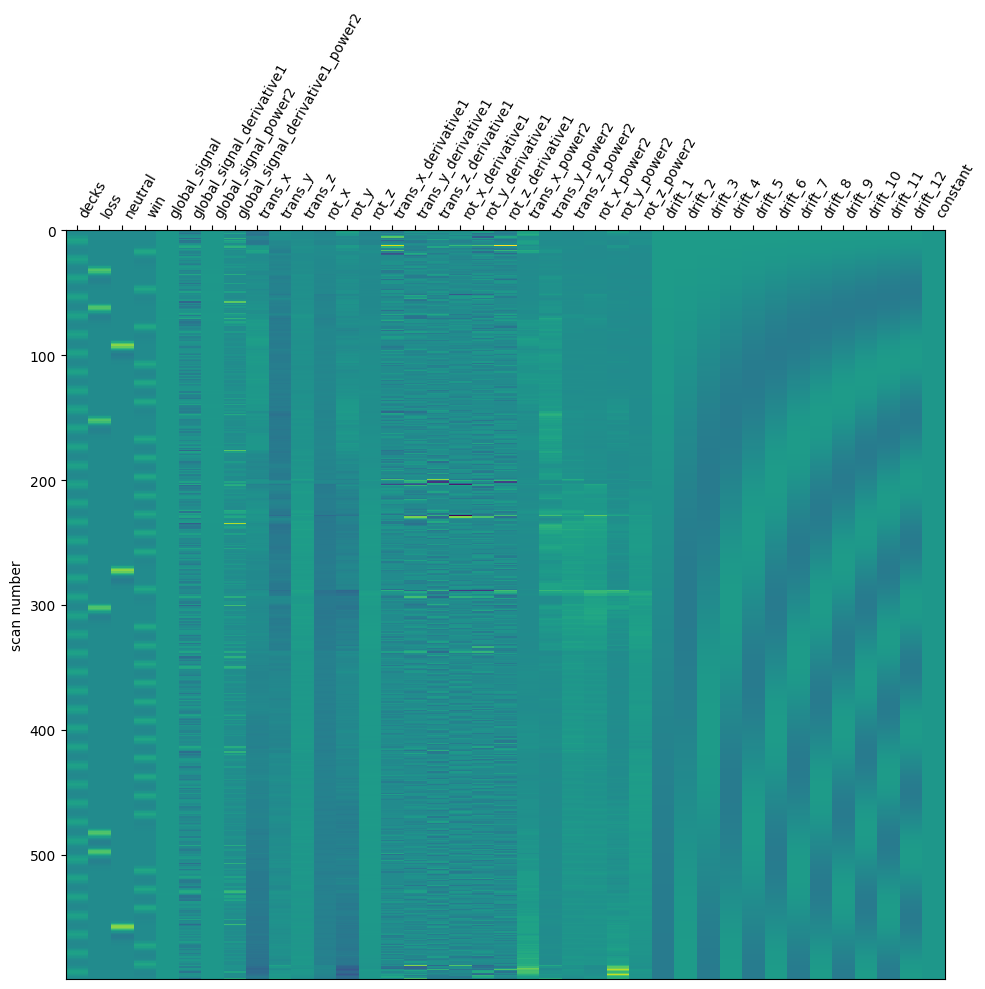

Finishing cell: 13:36:48


In [78]:
# Plot design matrix
from nilearn.plotting import plot_design_matrix

# Fetch data from first participant
model1=models[0]
# View the design matrix
design_matrix = model1.design_matrices_[0]


#Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [105]:
# Print number of each trial

# Base the events list on the paricipants included 
new_models_events=models_events[0] + models_events[1] + models_events[2] + models_events[3] + models_events[5]


from collections import Counter

# Initialize a counter to hold the aggregate counts of each trial_type
total_trial_counts = Counter()

# Loop over each run's data 
for run_data in new_models_events:
    # Count occurrences of each trial_type in the current run
    trial_counts = run_data['trial_type'].value_counts().to_dict()
    # Update the aggregate counter with counts from the current run
    total_trial_counts.update(trial_counts)

# Print
for trial_type, count in total_trial_counts.items():
    print(f"{trial_type}: {count}")



decks: 800
win: 589
loss: 97
neutral: 114


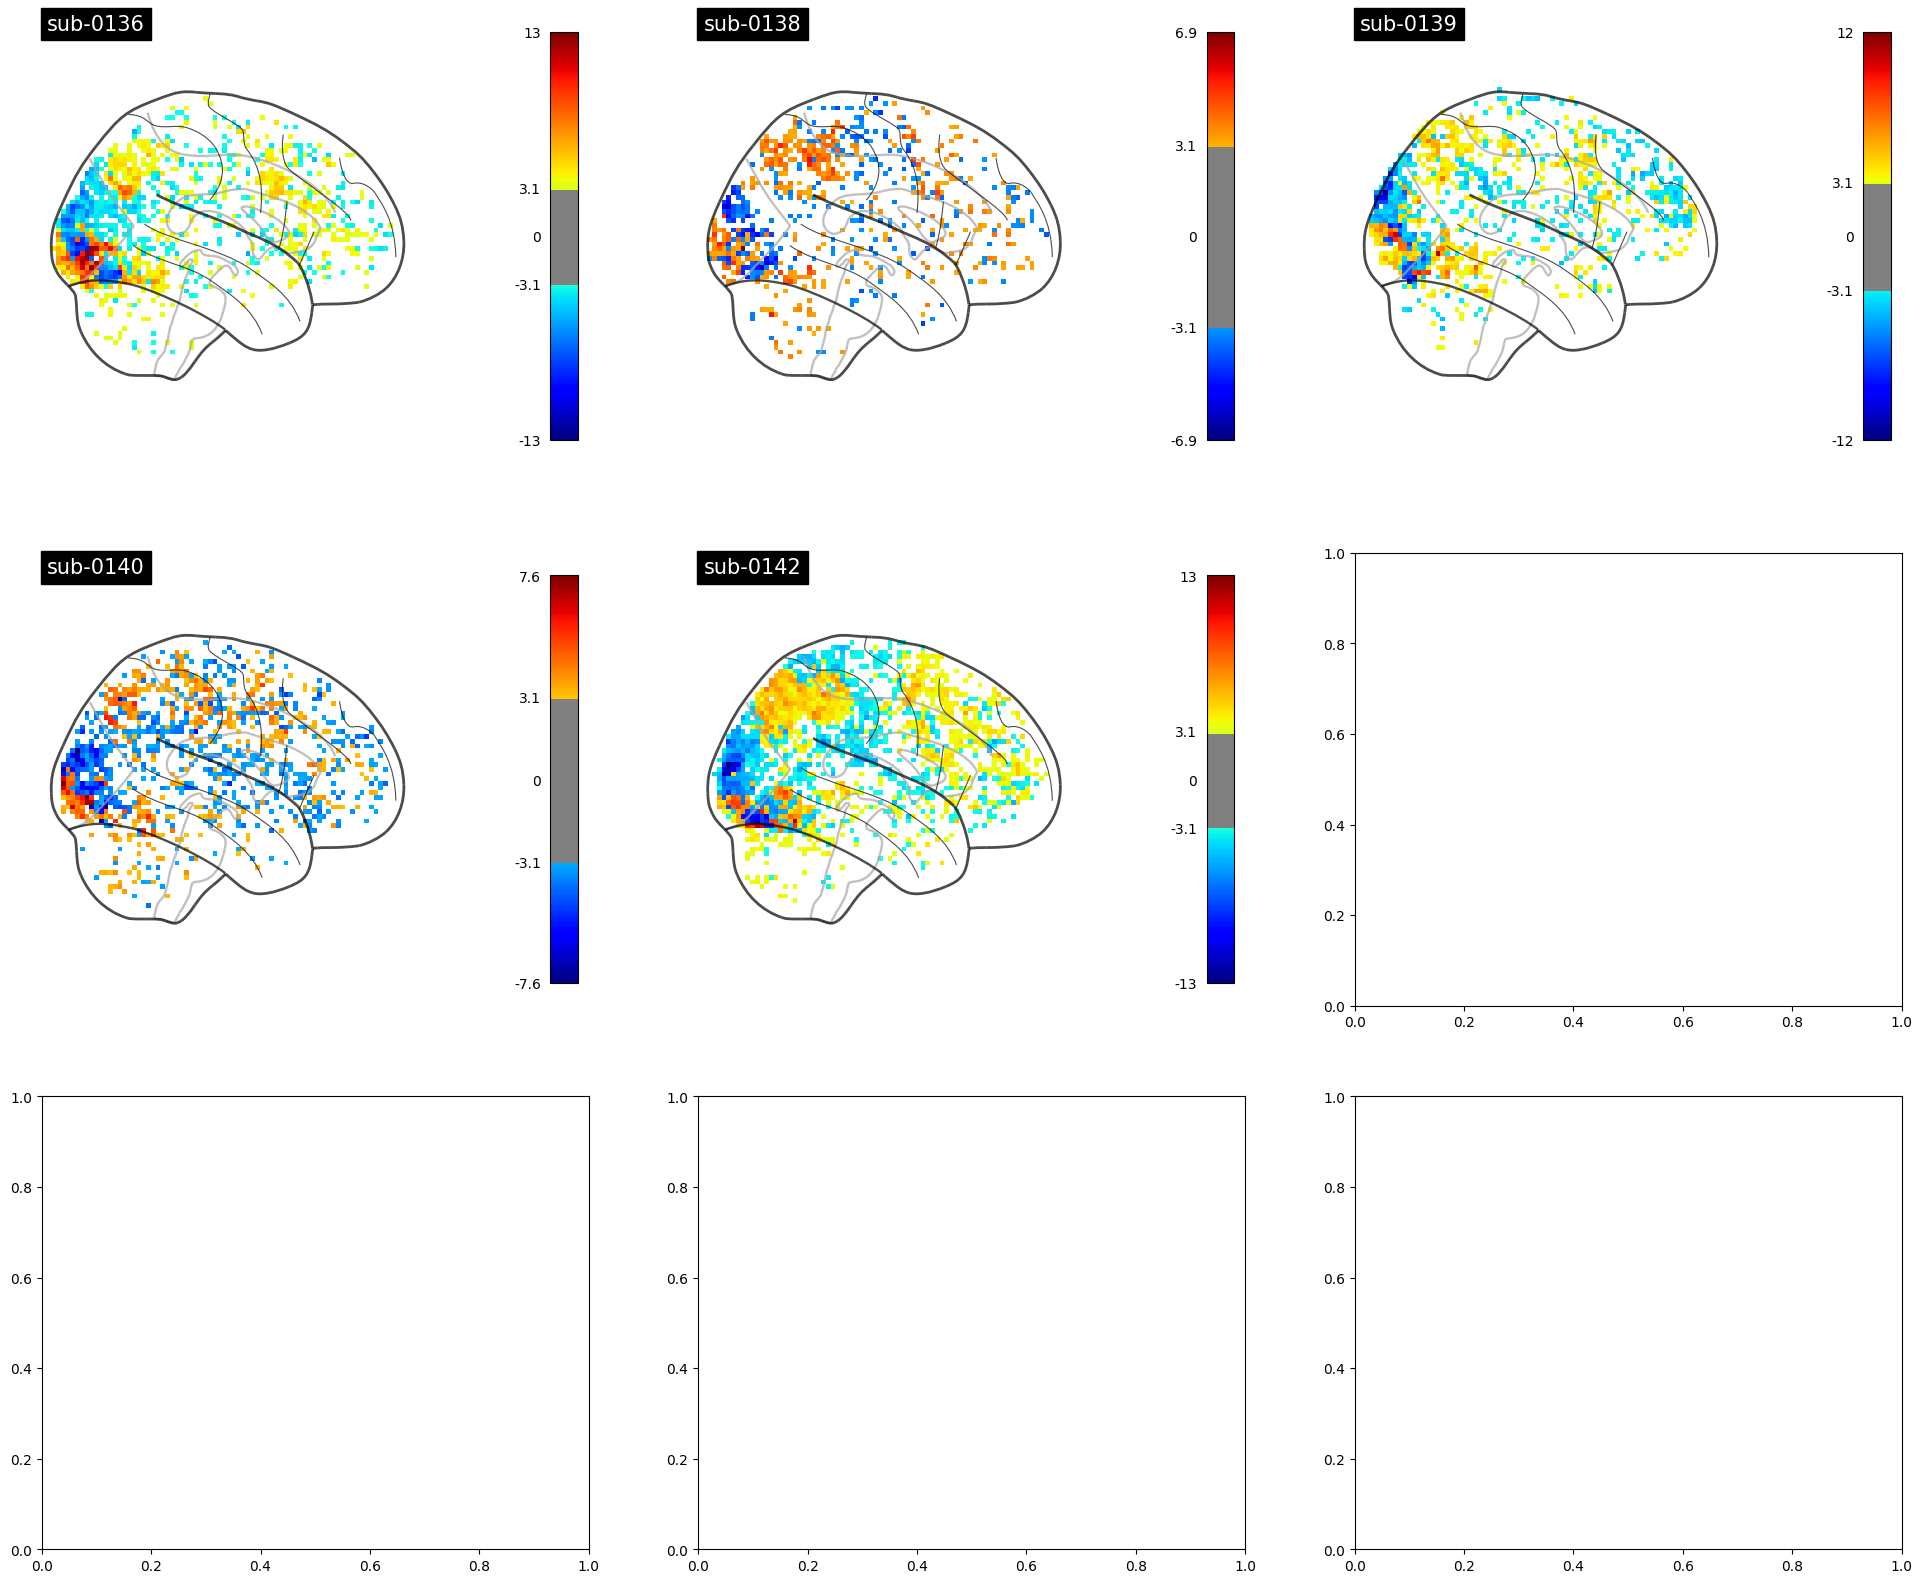

In [51]:
# Plot the first level models

from scipy.stats import norm
p001_unc = norm.isf(0.001)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 20)) 
for m_idx, model in enumerate(models):

    #Plot each thresholded analysis
    plotting.plot_glass_brain(model.zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 3), int(m_idx % 3)],
                              plot_abs=False, display_mode='x')

In [52]:
# Creating second level model 

from nilearn.glm.second_level import SecondLevelModel
#We will simply add the models estimated above to the second level
second_level_input = models

#Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)

print(second_level_model)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 4 runs
  sample_map = sample_model.compute_contrast(


SecondLevelModel(smoothing_fwhm=8.0)
Finishing cell: 11:36:36


In [54]:
# Make contrast 
zmap_g = second_level_model.compute_contrast(first_level_contrast='loss-decks')

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = mode

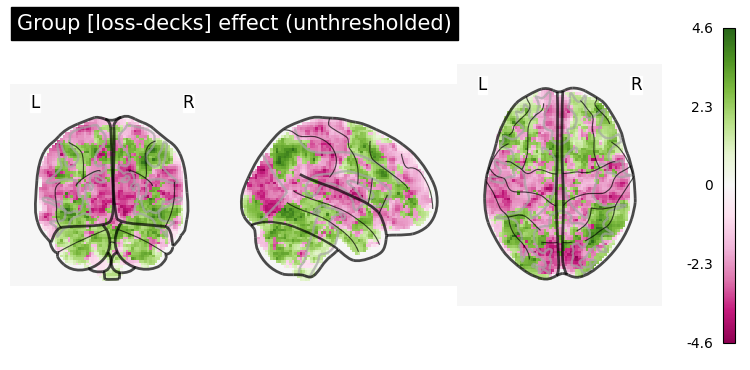

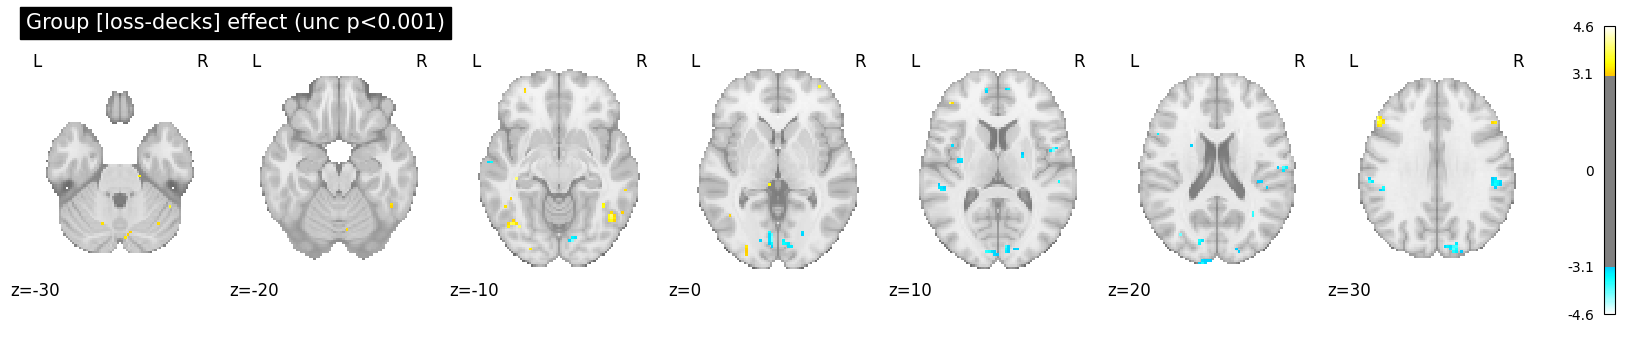

Finishing cell: 11:37:24


In [55]:
# Plot the uncorrected contrast

from nilearn.plotting import plot_stat_map
import matplotlib

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=None,
                          title='Group [loss-decks] effect (unthresholded)',
                          plot_abs=False)
plt.show()

plot_stat_map(zmap_g, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group [loss-decks] effect (unc p<0.001)')
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/thresholding.py:297: UserWarning: The given float value must not exceed 4.628942612578797. But, you have given threshold=5.032840755848977.
  stat_img = threshold_img(


The p<.05 FWER-corrected threshold is 5.03


/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


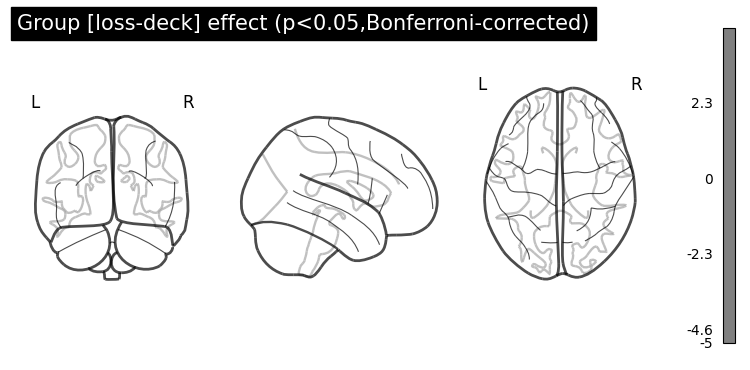

Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []


/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/reporting/get_clusters_table.py:302: UserWarning: The given float value must not exceed 4.628942612578797. But, you have given threshold=5.032840755848977.
  stat_img = threshold_img(
/tmp/ipykernel_663/2215502187.py:17: UserWarning: Attention: No clusters with stat higher than 5.032840755848977
  table = get_clusters_table(zmap_g, stat_threshold=threshold)


In [56]:
# Plot the corrected contrast

from nilearn.reporting import get_clusters_table

from nilearn.glm import threshold_stats_img

thresholded_map, threshold = threshold_stats_img(
    zmap_g, alpha=0.05, height_control='bonferroni')
print('The p<.05 FWER-corrected threshold is %.3g' % threshold)

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=threshold,
                          title='Group [loss-deck] effect (p<0.05,Bonferroni-corrected)',
                          plot_abs=False)
plt.show()

# Make a table of cluster coordinates.
table = get_clusters_table(zmap_g, stat_threshold=threshold)
print(table)

In [57]:
# Create atlas map

from atlasreader import create_output
from IPython.display import display, HTML
import pandas as pd

wd=os.getcwd()
os.chdir('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks')
outdir='/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks'

# Save the thresholded image into a NIfTI file
file_name = "stat_img.nii.gz"
zmap_g.to_filename(file_name)
output = create_output(zmap_g, voxel_thresh=threshold, cluster_extent=0,direction='both',outdir=outdir)
print(output)
# there are no significant clusters or peaks in the input image (zmap_g) after applying the specified voxel_thresh, causing output to be None. 
# This makes atlasreader skip creating the 2 files, peaks and clusters.


#Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
#peaks=pd.read_csv('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks/atlasreader_peaks.csv')
#display(peaks)

#clusters=pd.read_csv('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_loss_decks/atlasreader_clusters.csv')
#display(clusters)
#os.chdir(wd)

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


None


#### For contrast neutral - decks

Before running the contrast make sure to run all the code from 'Read in fMRI data' and 'Subset confounds and events' (This ensures that the models from previous contasts are not saved)

In [115]:
from datetime import datetime
from nilearn import plotting
import matplotlib.pyplot as plt
import pickle
import os

# Specify where to save the results
res_dir= '/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks' #must contain 0 files for the next code to run

In [70]:
# Make path if it does not exist

if os.path.isdir(res_dir)==False:
    print('Making results directory:', res_dir)
    os.mkdir(res_dir)
    n_res_files=    len([name for name in os.listdir('.') if os.path.isfile(name)])
    print ('Number of files in results folder: ', n_res_files)
else:
    print('Results directory ', res_dir, 'already exists')
    #Count number of files in results directory
    wd=os.getcwd()
    os.chdir(res_dir)
    n_res_files=    len([name for name in os.listdir('.') if os.path.isfile(name)])
    print ('Number of files in results folder: ', n_res_files)
    os.chdir(wd)

Results directory  /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks2 already exists
Number of files in results folder:  0


In [71]:
# First level model on all participants

now = datetime.now()
print('Starting cell:', now.strftime("%H:%M:%S"))

# Zip model and args
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)

for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    print(f"Processing subject: {model.subject_label}")
    
    # File path where the model would be saved
    file = os.path.join(res_dir, f'iowa2024_NEUTRAL_DECKS_first_level_model_{model.subject_label}.pkl')

    # Check if the model has already been saved
    if os.path.exists(file):
        print(f"Skipping participant: {model.subject_label} (Already saved: {file})")
        continue  # Skip to the next iteration if the file exists

    # Fit the GLM for subjects not yet processed
    if m_idx + 1 > n_res_files:
        print(f"Fitting participant: {model.subject_label}, ({m_idx + 1}/{len(models)})")
    
        # Fit the model
        model.fit(imgs, events, confounds)

        # Check if 'neutral' and 'loss' are valid contrast terms
        if 'neutral' in model.design_matrices_[0].columns and 'decks' in model.design_matrices_[0].columns:
            try:
                # Explicitly check for multi-run data and compute contrast accordingly
                print(f"Computing contrast 'neutral - decks' for {model.subject_label}")
                
                # Compute contrast
                model.zmap = model.compute_contrast('neutral - decks', output_type = 'z_score')
                
                # Save fitted model
                print('Saving:', file)
                with open(file, 'wb') as f:
                    pickle.dump([model], f)

                now = datetime.now()
                print('Finished fitting:', model.subject_label, now.strftime("%H:%M:%S"))
            
            except ValueError as e:
                print(f"Error computing contrast for {model.subject_label}: {e}")
        
        else:
            print(f"Skipping participant: {model.subject_label} (No 'neutral' or 'decks')")

now = datetime.now()
print('Finishing cell:', now.strftime("%H:%M:%S"))

Starting cell: 11:51:50
Processing subject: 0136
Fitting participant: 0136, (1/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (155 seconds remaining)
Computing run 3 out of 4 runs (86 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 4 out of 4 runs (39 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)

Computation of 4 runs done in 150.13875555992126 seconds.

/tmp/ipykernel_663/4106500885.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('neutral - decks', output_type = 'z_score')


Computing contrast 'neutral - decks' for 0136
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks2/iowa2024_NEUTRAL_DECKS_first_level_model_0136.pkl
Finished fitting: 0136 11:54:54
Processing subject: 0138
Fitting participant: 0138, (2/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (108 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 3 out of 4 runs (70 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scaling)
Computing run 4 out of 4 runs (35 seconds remaining)
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:707: UserWarning: Mean values of 0 observed. The data have probably been centered.Scaling might not work as expected
  Y, _ = mean_scaling(Y, self.signal_scalin

Computing contrast 'neutral - decks' for 0138
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks2/iowa2024_NEUTRAL_DECKS_first_level_model_0138.pkl
Finished fitting: 0138 11:57:45
Processing subject: 0139
Fitting participant: 0139, (3/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (79 seconds remaining)
Computing run 3 out of 4 runs (56 seconds remaining)
Computing run 4 out of 4 runs (28 seconds remaining)

Computation of 4 runs done in 116.49109148979187 seconds.

/tmp/ipykernel_663/4106500885.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('neutral - decks', output_type = 'z_score')


Computing contrast 'neutral - decks' for 0139
Error computing contrast for 0139: The expression (neutral - decks) is not valid. This could be due to defining the contrasts using design matrix columns that are invalid python identifiers.
Processing subject: 0140
Fitting participant: 0140, (4/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (100 seconds remaining)
Computing run 3 out of 4 runs (158 seconds remaining)
Computing run 4 out of 4 runs (63 seconds remaining)

Computation of 4 runs done in 224.1861057281494 seconds.

/tmp/ipykernel_663/4106500885.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('neutral - decks', output_type = 'z_score')


Computing contrast 'neutral - decks' for 0140
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks2/iowa2024_NEUTRAL_DECKS_first_level_model_0140.pkl
Finished fitting: 0140 12:04:22
Processing subject: 0141
Fitting participant: 0141, (5/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (246 seconds remaining)
Computing run 3 out of 4 runs (110 seconds remaining)
Computing run 4 out of 4 runs (43 seconds remaining)

Computation of 4 runs done in 163.04224228858948 seconds.

/tmp/ipykernel_663/4106500885.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('neutral - decks', output_type = 'z_score')


Computing contrast 'neutral - decks' for 0141
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks2/iowa2024_NEUTRAL_DECKS_first_level_model_0141.pkl
Finished fitting: 0141 12:07:38
Processing subject: 0142
Fitting participant: 0142, (6/6)


Computing run 1 out of 4 runs (go take a coffee, a big one)
Computing run 2 out of 4 runs (98 seconds remaining)
Computing run 3 out of 4 runs (72 seconds remaining)
Computing run 4 out of 4 runs (35 seconds remaining)

Computation of 4 runs done in 139.62633681297302 seconds.

/tmp/ipykernel_663/4106500885.py:40: UserWarning: One contrast given, assuming it for all 4 runs
  model.zmap = model.compute_contrast('neutral - decks', output_type = 'z_score')


Computing contrast 'neutral - decks' for 0142
Saving: /work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks2/iowa2024_NEUTRAL_DECKS_first_level_model_0142.pkl
Finished fitting: 0142 12:10:30
Finishing cell: 12:10:30


In [116]:
# Save

# Keep only models that have a corresponding file in `results_neutral_decks`
models = [
    model for model in models
    if os.path.exists(os.path.join(res_dir, f'iowa2024_NEUTRAL_DECKS_first_level_model_{model.subject_label}.pkl'))
]

f = open('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks/iowa2024_first_level_models_all.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()

In [117]:
# Load in the first level models
 
# Check if models are already loaded and if not --> load them
if 'models' not in locals():
    print('Loading saved first-level variables.')

    # Loading the data if it's not already loaded
    with open('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks/iowa2024_first_level_models_all', 'rb') as f:
        models, models_run_imgs, models_events, models_confounds = pickle.load(f)


# Load individually fitted models
for m_idx, model in enumerate(models):
    file = os.path.join(res_dir, f'iowa2024_NEUTRAL_DECKS_first_level_model_{model.subject_label}.pkl')
    
    # Check if the file exists
    if os.path.exists(file):
        print(f"Loading fitted model for participant: {model.subject_label} ({m_idx + 1}/{len(models)})")
        with open(file, 'rb') as f:
            loaded_model = pickle.load(f)
        
        # Verify if the subject labels match
        if model.subject_label == loaded_model[0].subject_label:
            models[m_idx] = loaded_model[0]
            print(f"Successfully loaded model for participant: {model.subject_label}")
        else:
            print(f"Subject mismatch for {model.subject_label}")
    else:
        # File not found, skip this participant
        print(f"Skipping participant {model.subject_label} (No saved model file found)")

print("All available models loaded.")



Loading fitted model for participant: 0136 (1/5)
Successfully loaded model for participant: 0136
Loading fitted model for participant: 0138 (2/5)
Successfully loaded model for participant: 0138
Loading fitted model for participant: 0140 (3/5)
Successfully loaded model for participant: 0140
Loading fitted model for participant: 0141 (4/5)
Successfully loaded model for participant: 0141
Loading fitted model for participant: 0142 (5/5)
Successfully loaded model for participant: 0142
All available models loaded.


In [118]:
# Check that the relevant models are saved correctly 
models

# Should contain 5 models (i.e. all but subject 139)

[FirstLevelModel(n_jobs=-2, subject_label='0136', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0138', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0140', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0141', t_r=1, verbose=1),
 FirstLevelModel(n_jobs=-2, subject_label='0142', t_r=1, verbose=1)]

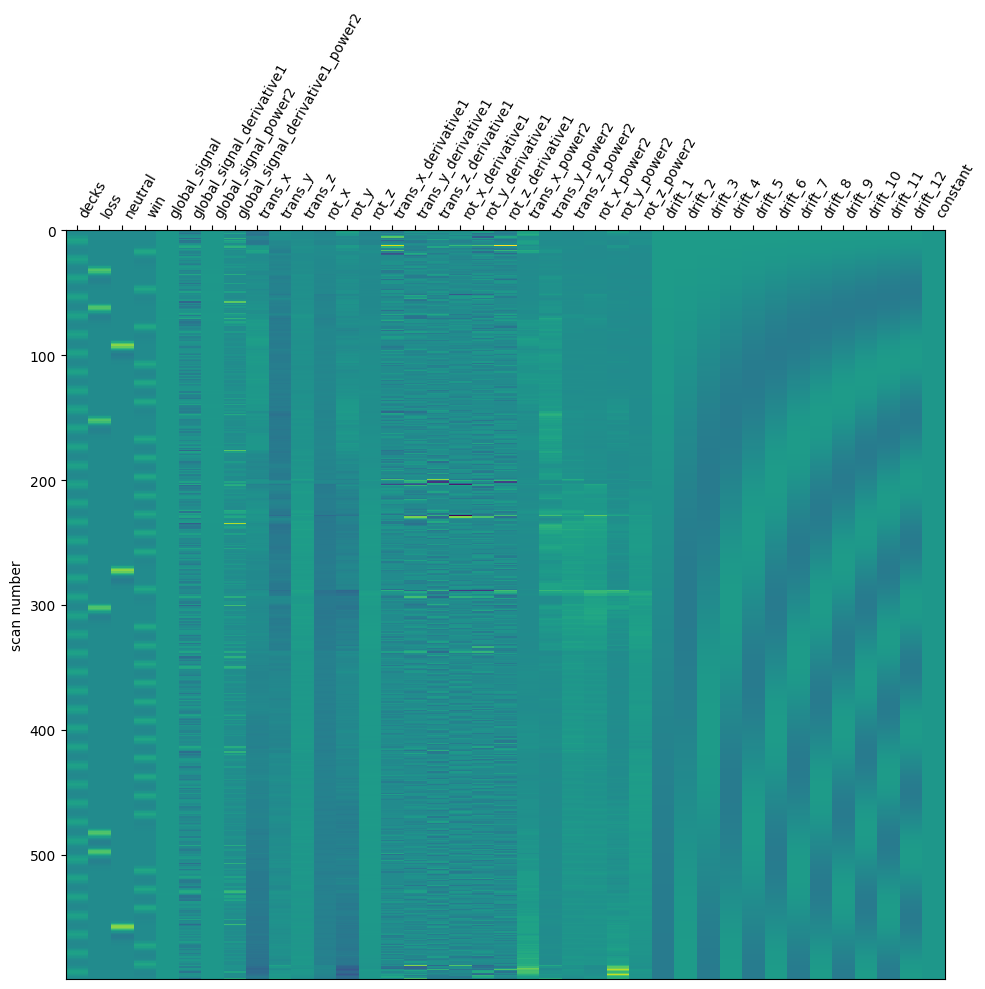

Finishing cell: 13:56:54


In [119]:
# Plot design matrix
from nilearn.plotting import plot_design_matrix

# Fetch data from first participant
model1=models[0]
# View the design matrix
design_matrix = model1.design_matrices_[0]


#Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [120]:
# Print number of each trial

# Base the events list on the paricipants included 
new_models_events=models_events[0] + models_events[1] + models_events[3] + models_events[4] + models_events[5]


from collections import Counter

# Initialize a counter to hold the aggregate counts of each trial_type
total_trial_counts = Counter()

# Loop over each run's data 
for run_data in new_models_events:
    # Count occurrences of each trial_type in the current run
    trial_counts = run_data['trial_type'].value_counts().to_dict()
    # Update the aggregate counter with counts from the current run
    total_trial_counts.update(trial_counts)

# Print
for trial_type, count in total_trial_counts.items():
    print(f"{trial_type}: {count}")


decks: 800
win: 554
loss: 84
neutral: 162


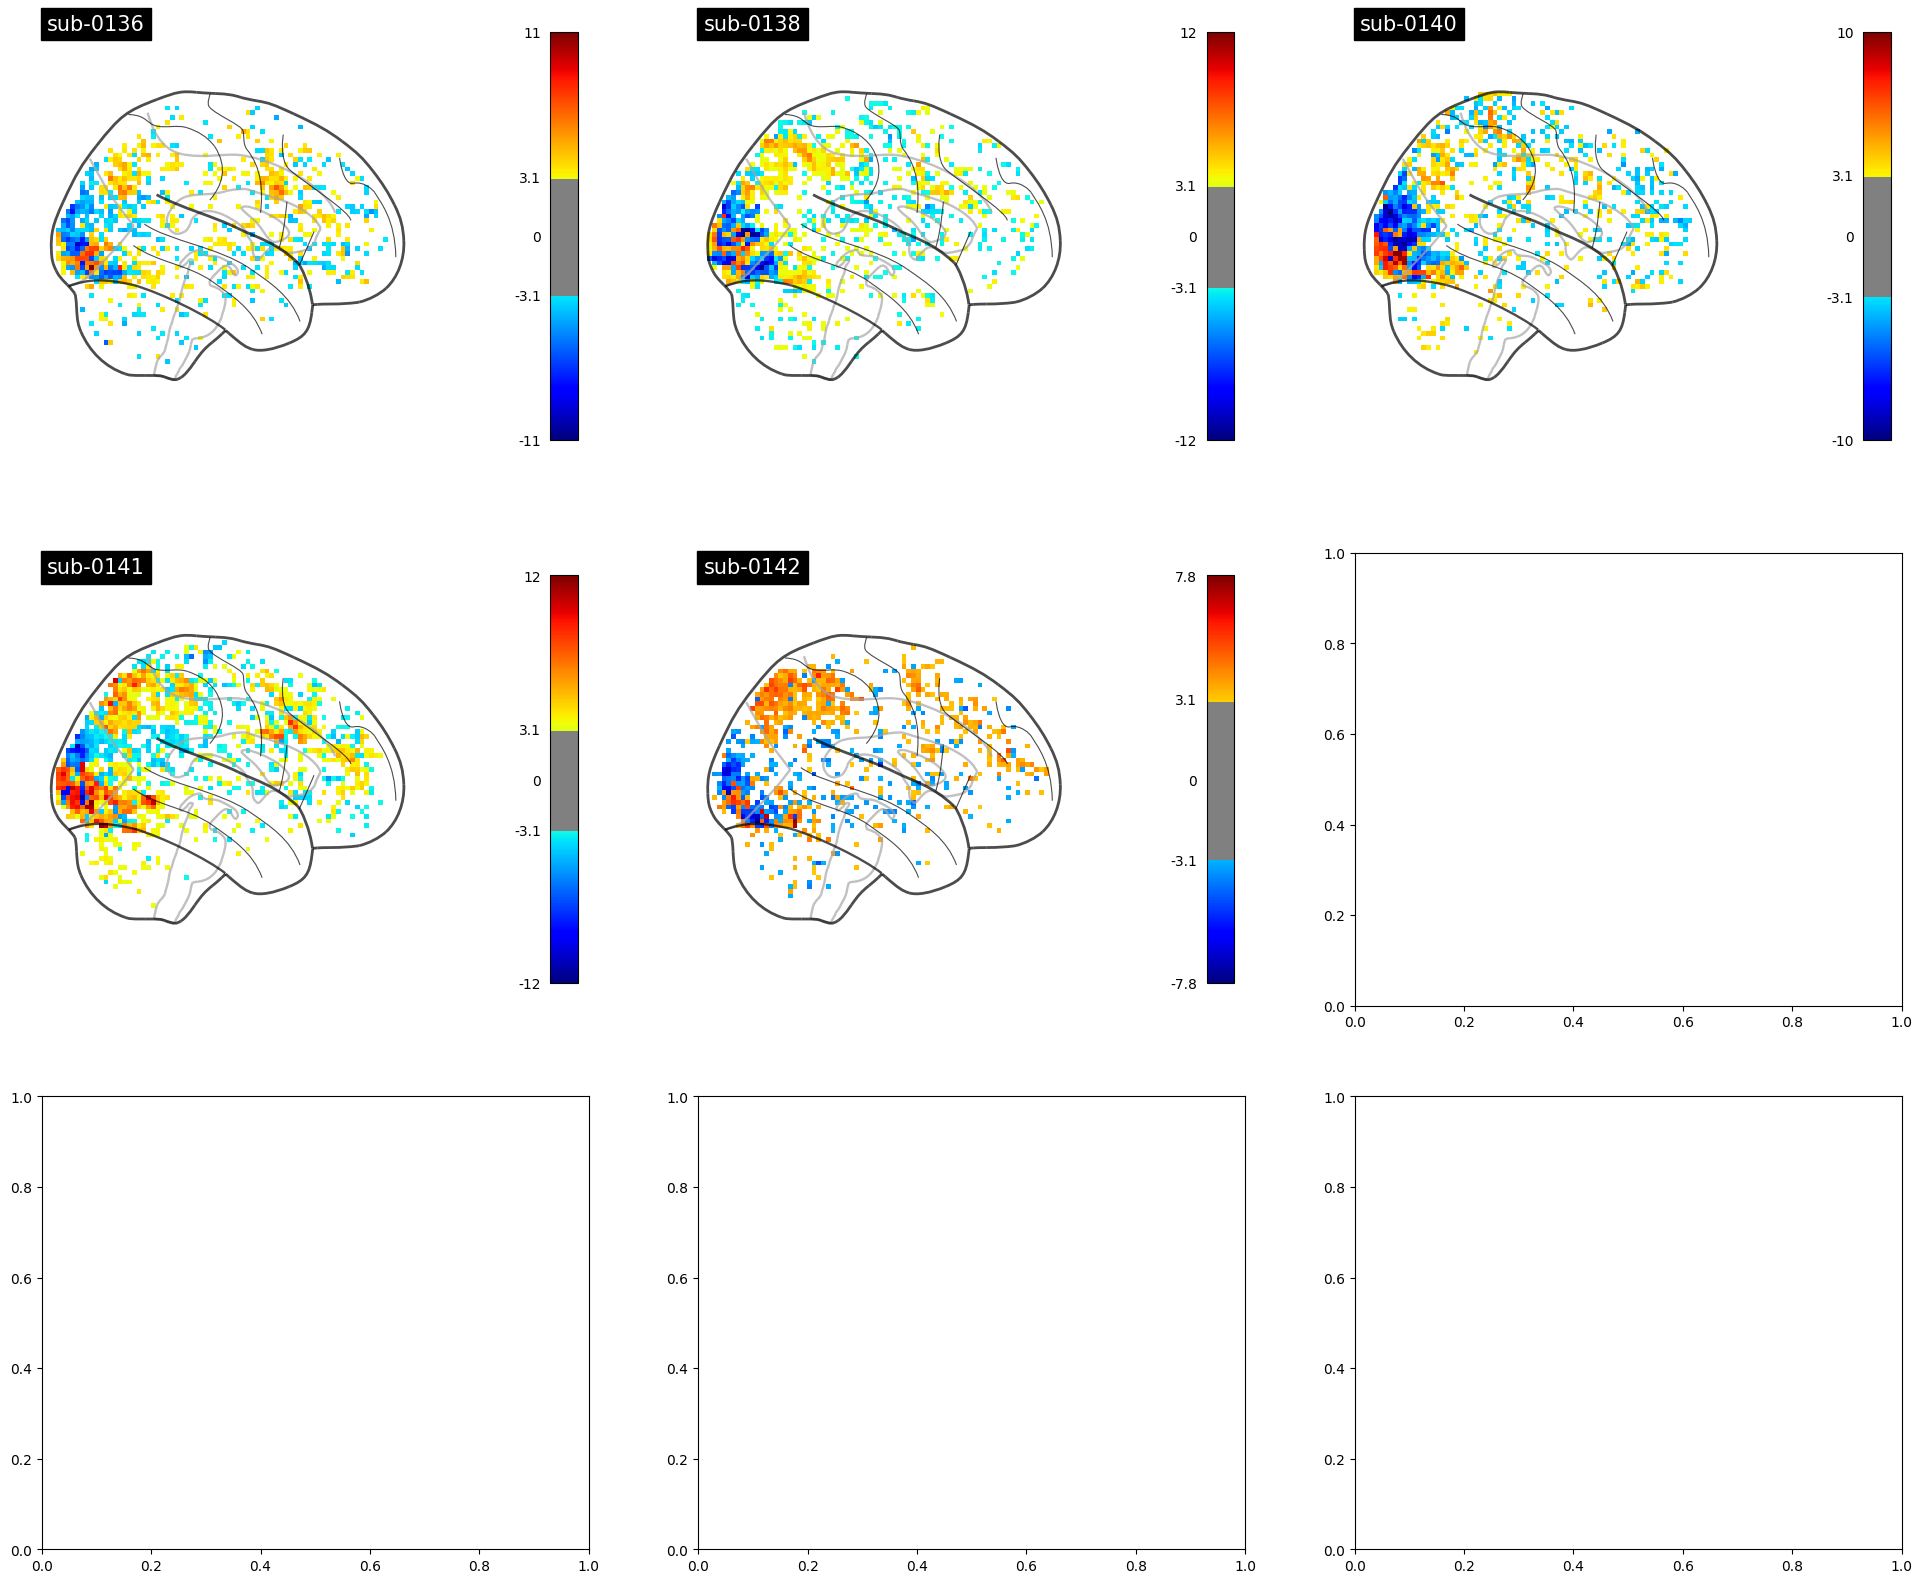

In [78]:
# Plot the first level models

from scipy.stats import norm
p001_unc = norm.isf(0.001)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 20)) 
for m_idx, model in enumerate(models):

    #Plot each thresholded analysis
    plotting.plot_glass_brain(model.zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 3), int(m_idx % 3)],
                              plot_abs=False, display_mode='x')

In [79]:
# Creating second level model 
from nilearn.glm.second_level import SecondLevelModel

# We will simply add the models estimated above to the second level
second_level_input = models

# Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)
print(second_level_model)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 4 runs
  sample_map = sample_model.compute_contrast(


SecondLevelModel(smoothing_fwhm=8.0)
Finishing cell: 12:12:36


In [80]:
# Make contrast 
zmap_g = second_level_model.compute_contrast(
    first_level_contrast='neutral-decks')

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = mode

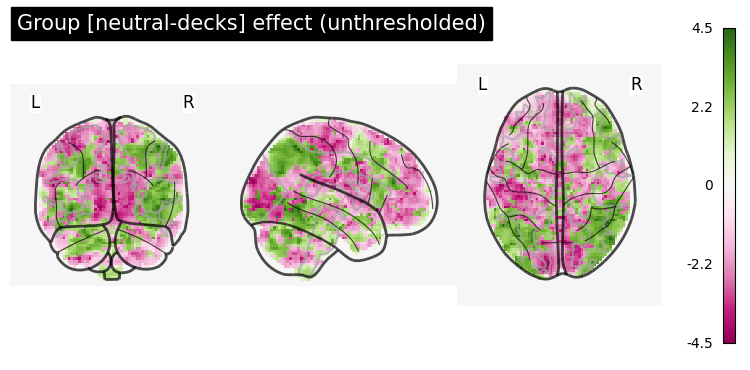

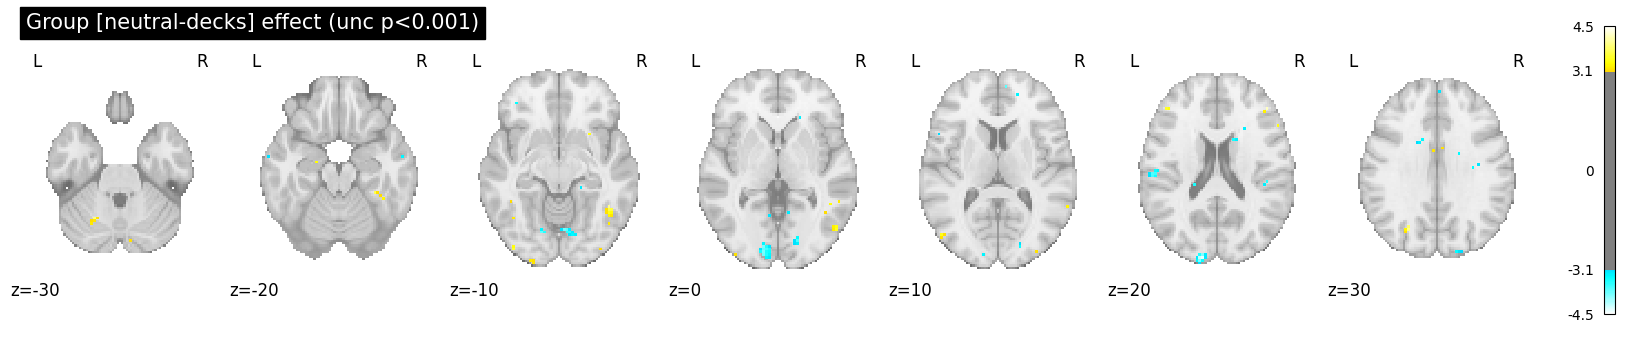

Finishing cell: 12:13:13


In [81]:
# Plot the uncorrected contrast

from nilearn.plotting import plot_stat_map
import matplotlib

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=None,
                          title='Group [neutral-decks] effect (unthresholded)',
                          plot_abs=False)
plt.show()

plot_stat_map(zmap_g, cmap='cold_hot',threshold=p001_unc, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='Group [neutral-decks] effect (unc p<0.001)')
plt.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/glm/thresholding.py:297: UserWarning: The given float value must not exceed 4.4705458381558385. But, you have given threshold=5.032840755848977.
  stat_img = threshold_img(


The p<.05 FWER-corrected threshold is 5.03


/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


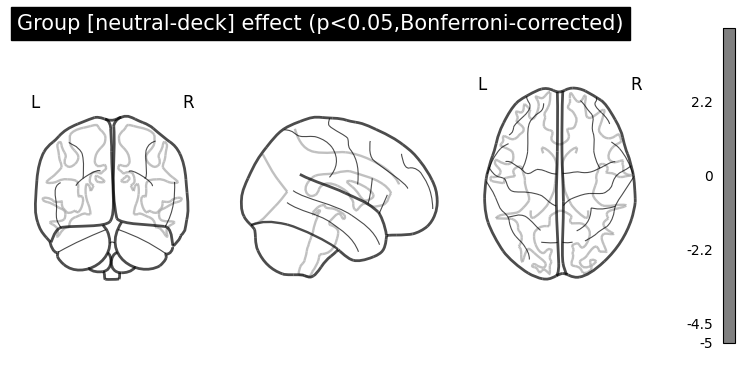

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/reporting/get_clusters_table.py:302: UserWarning: The given float value must not exceed 4.4705458381558385. But, you have given threshold=5.032840755848977.
  stat_img = threshold_img(


Empty DataFrame
Columns: [Cluster ID, X, Y, Z, Peak Stat, Cluster Size (mm3)]
Index: []


/tmp/ipykernel_663/732655582.py:16: UserWarning: Attention: No clusters with stat higher than 5.032840755848977
  table = get_clusters_table(zmap_g, stat_threshold=threshold)


In [82]:
# Plot the corrected contrast

from nilearn.reporting import get_clusters_table
from nilearn.glm import threshold_stats_img

thresholded_map, threshold = threshold_stats_img(
    zmap_g, alpha=0.05, height_control='bonferroni')
print('The p<.05 FWER-corrected threshold is %.3g' % threshold)

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=threshold,
                          title='Group [neutral-deck] effect (p<0.05,Bonferroni-corrected)',
                          plot_abs=False)
plt.show()

# Make a table of cluster coordinates.
table = get_clusters_table(zmap_g, stat_threshold=threshold)
print(table)

In [84]:
# Create atlas map

from atlasreader import create_output
from IPython.display import display, HTML
import pandas as pd

wd=os.getcwd()
os.chdir('/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks')
outdir='/work/student_folders/Ida_D_folder/notebooks_fMRI/Portfolio_2/results_neutral_decks'

# Save the thresholded image into a NIfTI file
file_name = "stat_img.nii.gz"
zmap_g.to_filename(file_name)
output = create_output(zmap_g, voxel_thresh=threshold, cluster_extent=0,direction='both',outdir=outdir)
print(output)
# there are no significant clusters or peaks in the input image (zmap_g) after applying the specified voxel_thresh, causing output to be None. 
# This makes atlasreader skip creating the 2 files, peaks and clusters.


#Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
#peaks=pd.read_csv('atlasreader_peaks_neutral.csv')
#display(peaks)

#clusters=pd.read_csv('atlasreader_clusters_neutral.csv')
#display(clusters)
#os.chdir(wd)

/work/notebooks_fMRI/virt_env/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


None
